II. Попередня обробка зображень, детекція та сегментація об'єктів на зображеннях
================================================================================

_Image Analysis with Python and Napari, Bioinformatics for Ukraine course, 6-24 October 2025, Kyiv, Ukraine._

_© Borys Olifirov, 2025_

__План:__
- Складніші способи оцінки фони (rolling ball)
- Сегментація зображень, побудова масок із використанням алгоритма Отсу
- Інші підходи до сегментації і багаторівненва сегментація
- Фільтрація зображень, фільтра Гауса та медіанний фільтр
- Морфологічні операції із масками

---

In [6]:
import numpy as np
import skimage  # scikit-image
import matplotlib.pyplot as plt

# Фільтрація зображень
---

In [7]:
image = skimage.io.imread('demo_data/2D_grey_matter_neurofilaments.tif')  # завантаження зображень з використанням skimage
crop_image = image[1100:1500,350:750]

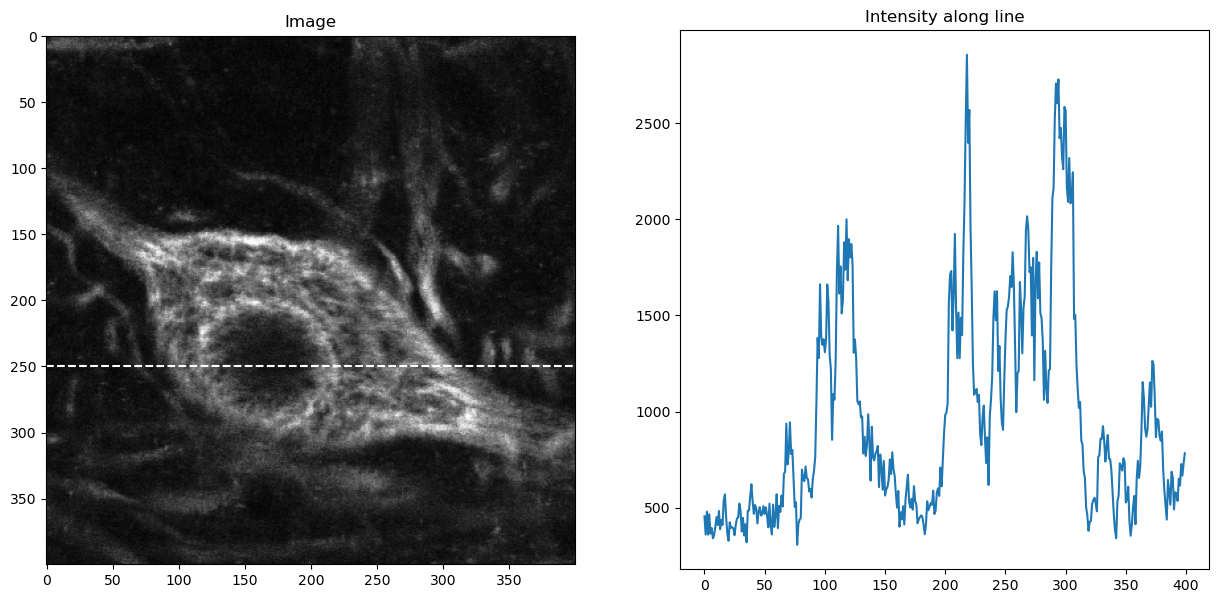

In [8]:
line_num = 250
image_line = crop_image[line_num,:]

fig, (ax0, ax1) = plt.subplots(ncols=2, figsize=(15,7))
ax0.imshow(crop_image, cmap='Greys_r')
ax0.axhline(line_num, color='w', linestyle='--')
ax0.set_title('Image')
ax1.plot(image_line)
ax1.set_title('Intensity along line')
plt.show()

## Гістограма зображення та просте маскування

196
4095


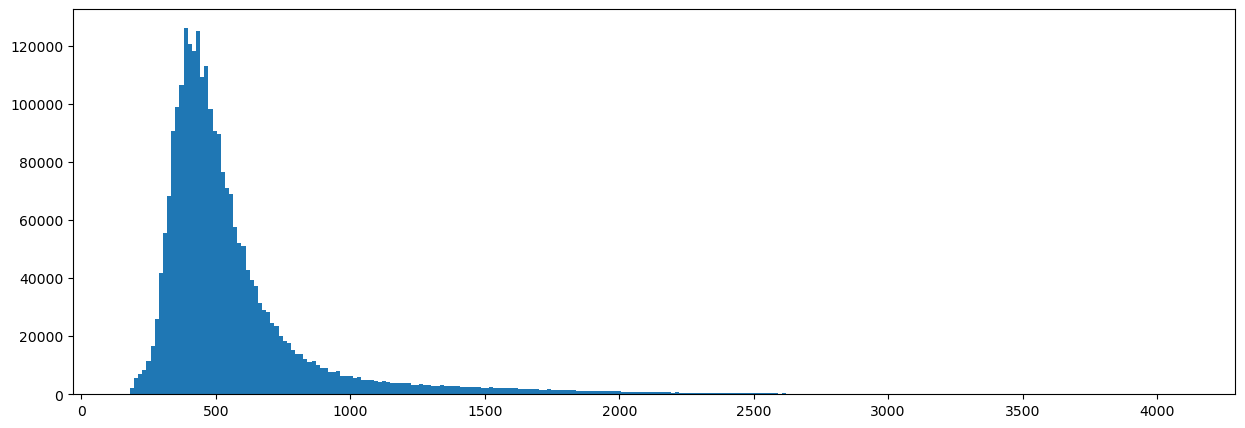

In [28]:
print(crop_image.min())
print(crop_image.max())

plt.figure(figsize=(15,5))
plt.hist(image.ravel(), bins=256)
plt.show()

(400, 400)
(1600, 1600)


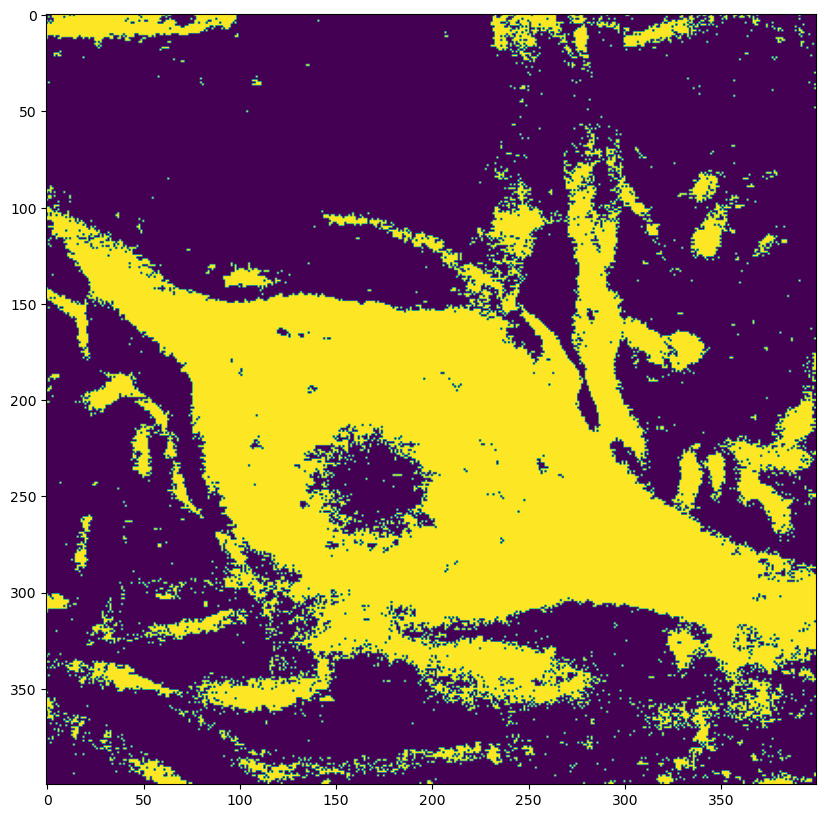

In [29]:
simple_mask = crop_image > 700

print(simple_mask.shape)
print(image.shape)

plt.figure(figsize=(10,10))
plt.imshow(simple_mask)

# Сегментація зображень
---

## Сегментація зображення з використання методу Отсу

1129


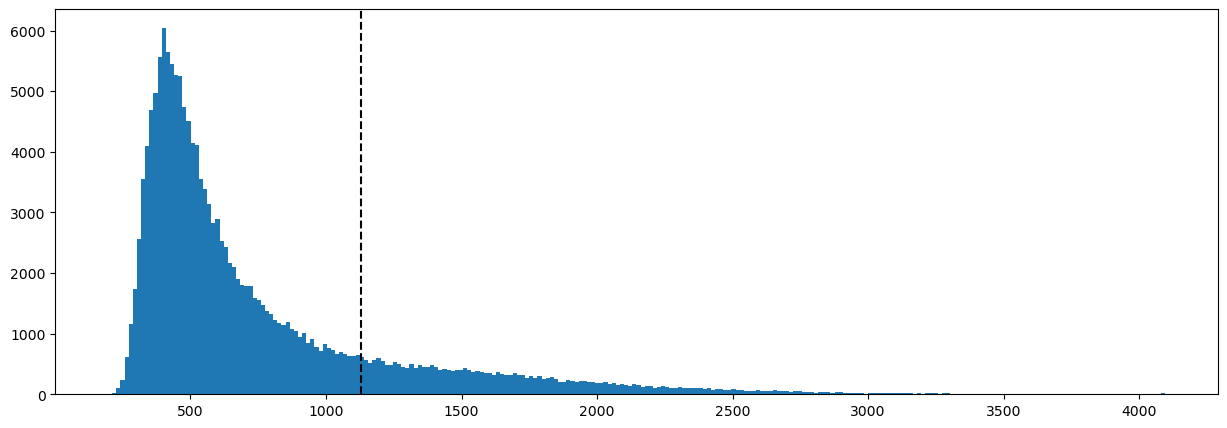

In [30]:
th_otsu = skimage.filters.threshold_otsu(crop_image)
print(th_otsu)

plt.figure(figsize=(15,5))
plt.hist(crop_image.ravel(), bins=256)
plt.axvline(x=th_otsu, linestyle='--', color='k')
plt.show()

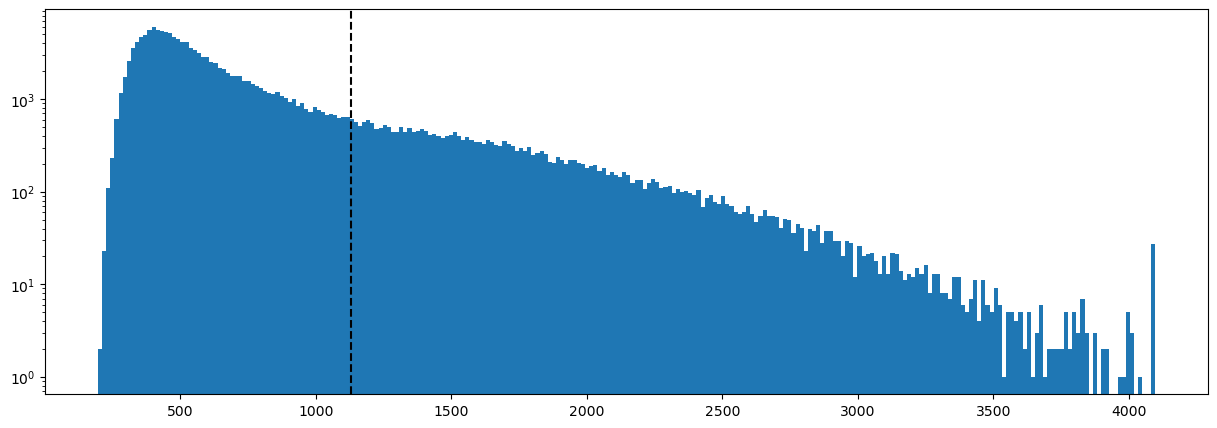

In [31]:
plt.figure(figsize=(15,5))
plt.hist(crop_image.ravel(), bins=256)
plt.axvline(x=th_otsu, linestyle='--', color='k')
plt.yscale('log')
plt.show()

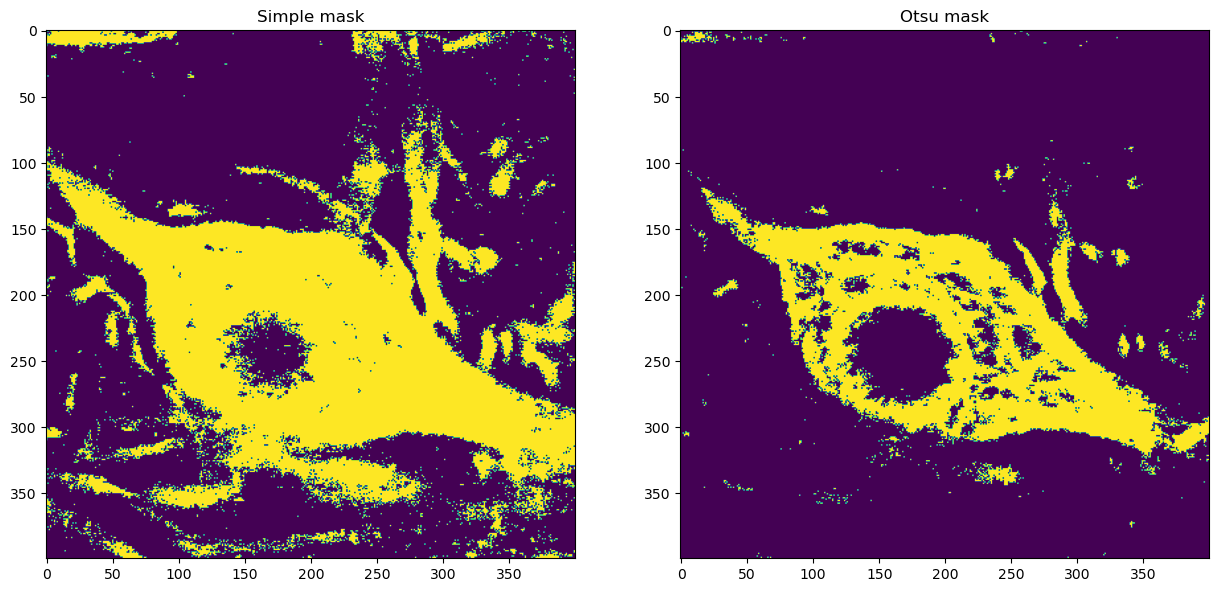

In [32]:
otsu_mask = crop_image > th_otsu

fig, (ax0, ax1) = plt.subplots(ncols=2, figsize=(15,7))
ax0.imshow(simple_mask)
ax0.set_title('Simple mask')
ax1.imshow(otsu_mask)
ax1.set_title('Otsu mask')
plt.show()

## Сегментація зображення з використання методу мульти Отсу

[ 808 1603]


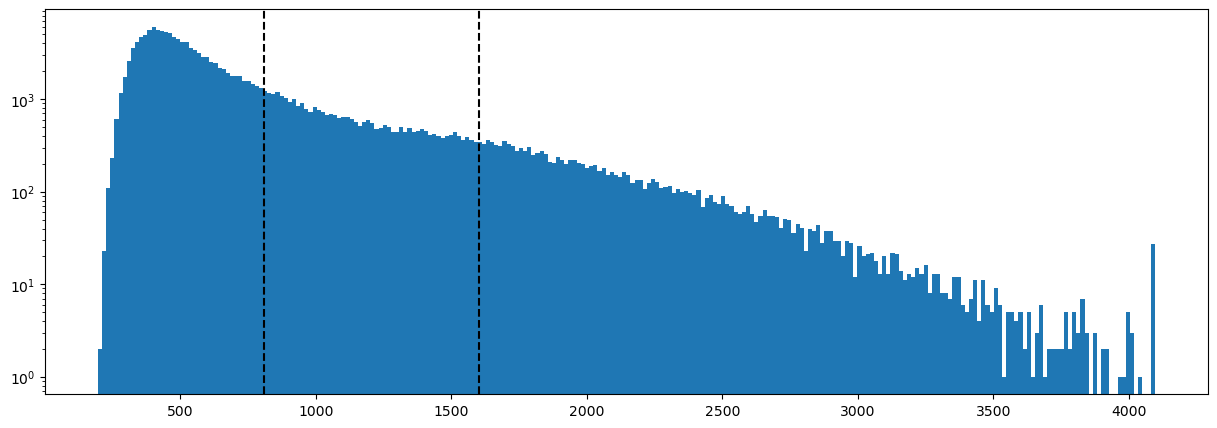

In [33]:
multi_otsu_th = skimage.filters.threshold_multiotsu(crop_image, classes=3)
print(multi_otsu_th)

plt.figure(figsize=(15,5))
plt.hist(crop_image.ravel(), bins=256)
plt.axvline(x=multi_otsu_th[0], linestyle='--', color='k')
plt.axvline(x=multi_otsu_th[-1], linestyle='--', color='k')
plt.yscale('log')
plt.show()

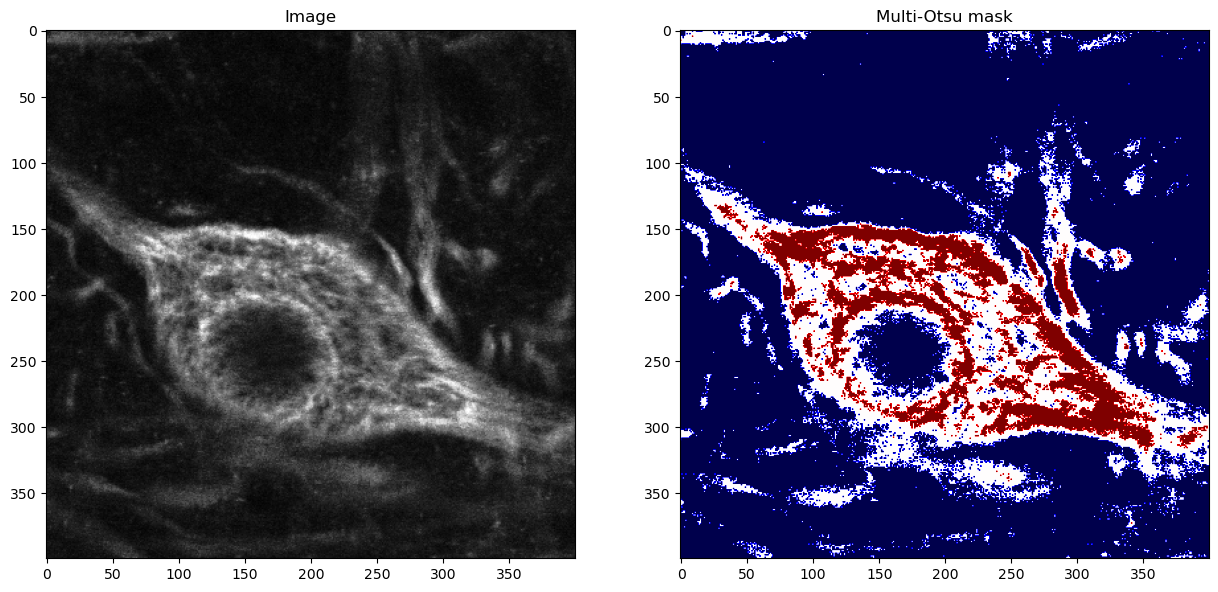

In [34]:
multiotsu_mask = np.digitize(crop_image, bins=multi_otsu_th)

fig, (ax0, ax1) = plt.subplots(ncols=2, figsize=(15,7))
ax0.imshow(crop_image, cmap='Greys_r')
ax0.set_title('Image')
ax1.imshow(multiotsu_mask, cmap='seismic')
ax1.set_title('Multi-Otsu mask')
plt.show()

## Фільтрація зображень

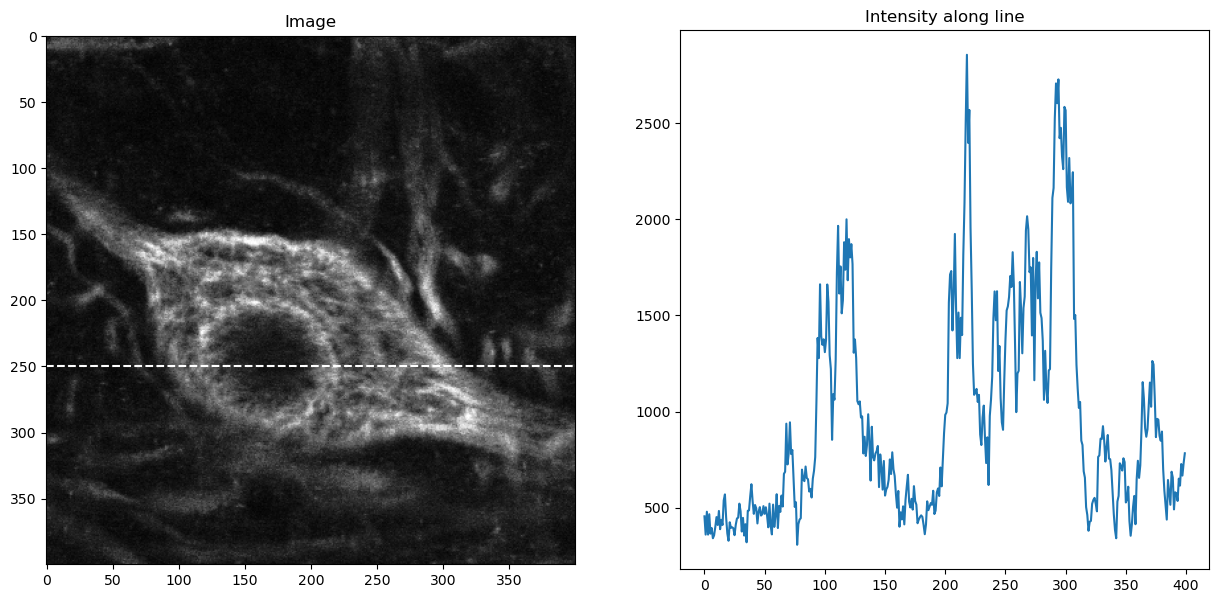

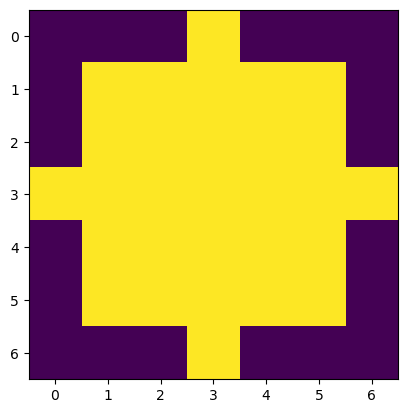

In [36]:
disk_fooprint = skimage.morphology.disk(3)
plt.imshow(disk_fooprint)

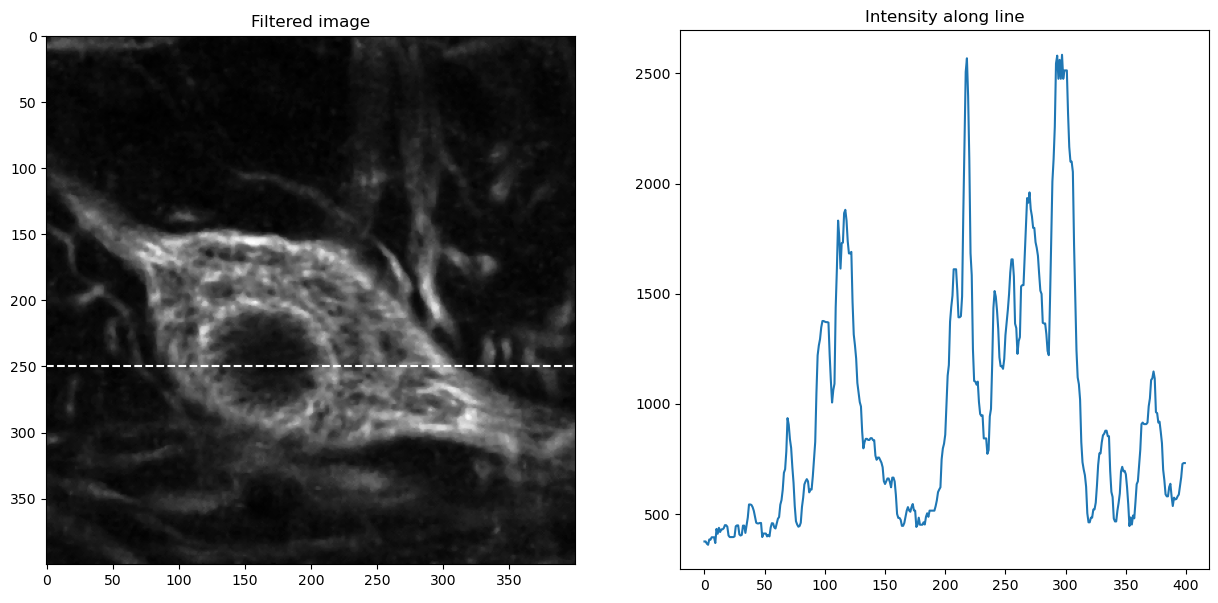

In [37]:
filtered_image = skimage.filters.median(crop_image, footprint=skimage.morphology.disk(2))

filtered_image_line = filtered_image[line_num,:]

fig, (ax0, ax1) = plt.subplots(ncols=2, figsize=(15,7))
ax0.imshow(filtered_image, cmap='Greys_r')
ax0.axhline(line_num, color='w', linestyle='--')
ax0.set_title('Filtered image')
ax1.plot(filtered_image_line)
ax1.set_title('Intensity along line')
plt.show()

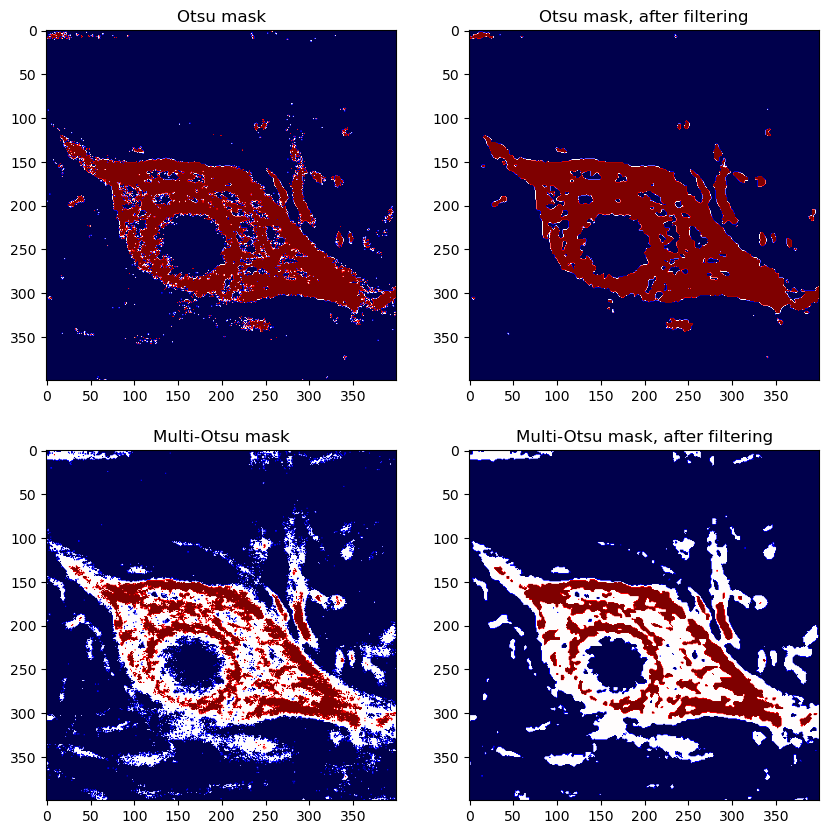

In [39]:
filtered_otsu_mask = filtered_image > skimage.filters.threshold_otsu(filtered_image)

filtered_multi_otsu_th = skimage.filters.threshold_multiotsu(filtered_image, classes=3)
filtered_multiotsu_mask = np.digitize(filtered_image, bins=multi_otsu_th)


fig, ax = plt.subplots(ncols=2, nrows=2, figsize=(10,10))
ax[0,0].imshow(otsu_mask, cmap='seismic')
ax[0,0].set_title('Otsu mask')
ax[0,1].imshow(filtered_otsu_mask, cmap='seismic')
ax[0,1].set_title('Otsu mask, after filtering')
ax[1,0].imshow(multiotsu_mask, cmap='seismic')
ax[1,0].set_title('Multi-Otsu mask')
ax[1,1].imshow(filtered_multiotsu_mask, cmap='seismic')
ax[1,1].set_title('Multi-Otsu mask, after filtering')
plt.show()

# Морфологічні операції із зображеннями
---

(100, 100)


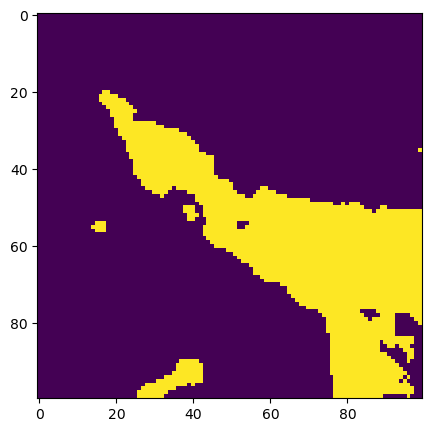

In [41]:
mask_fragment = filtered_otsu_mask[100:200,:100]
print(mask_fragment.shape)

plt.figure(figsize=(5,5))
plt.imshow(mask_fragment)

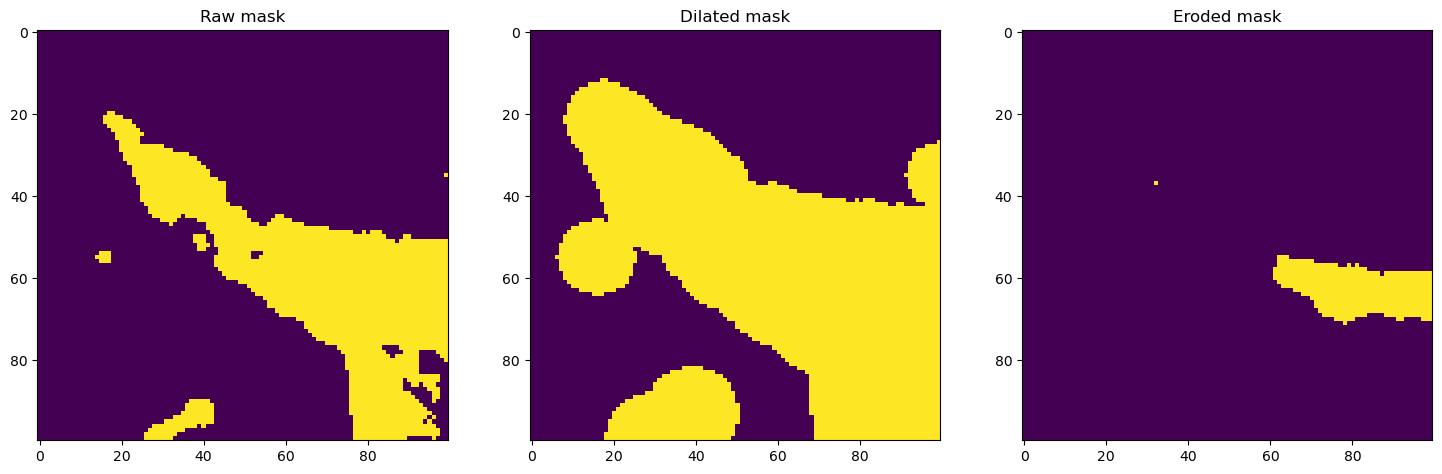

In [43]:
dilated_mask = skimage.morphology.dilation(mask_fragment, footprint=skimage.morphology.disk(8))
eroded_mask = skimage.morphology.erosion(mask_fragment, footprint=skimage.morphology.disk(8))

fig, ax = plt.subplots(ncols=3, figsize=(18,18))
ax[0].imshow(mask_fragment)
ax[0].set_title('Raw mask')
ax[1].imshow(dilated_mask)
ax[1].set_title('Dilated mask')
ax[2].imshow(eroded_mask)
ax[2].set_title('Eroded mask')
plt.show()

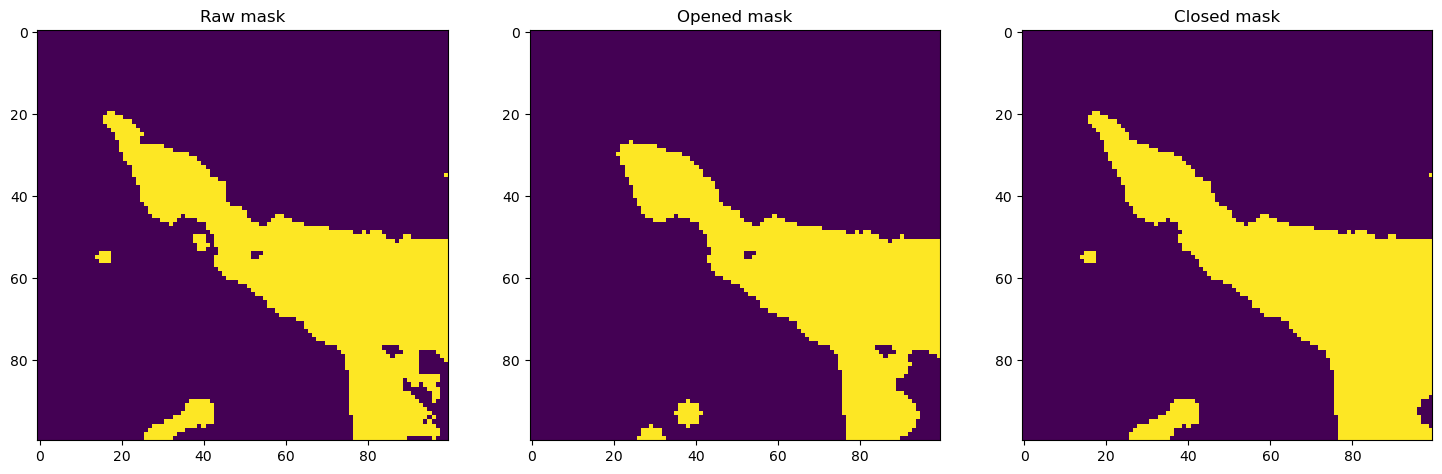

In [45]:
opened_mask = skimage.morphology.opening(mask_fragment, footprint=skimage.morphology.disk(3))
closed_mask = skimage.morphology.closing(mask_fragment, footprint=skimage.morphology.disk(3))

fig, ax = plt.subplots(ncols=3, figsize=(18,18))
ax[0].imshow(mask_fragment)
ax[0].set_title('Raw mask')
ax[1].imshow(opened_mask)
ax[1].set_title('Opened mask')
ax[2].imshow(closed_mask)
ax[2].set_title('Closed mask')
plt.show()

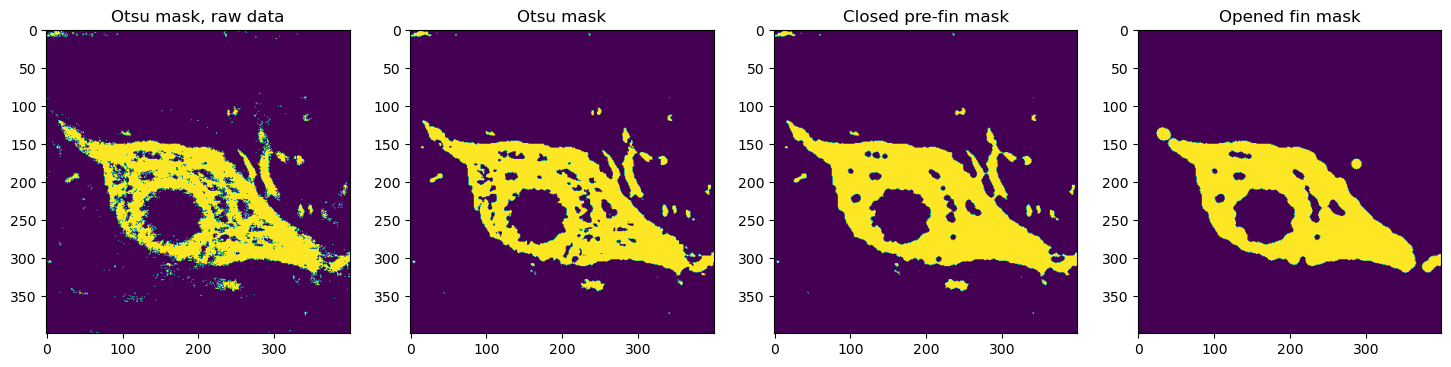

In [46]:
pre_final_mask = skimage.morphology.closing(filtered_otsu_mask, footprint=skimage.morphology.disk(3))
final_mask = skimage.morphology.opening(pre_final_mask, footprint=skimage.morphology.disk(7))

fig, ax = plt.subplots(ncols=4, figsize=(18,18))
ax[0].imshow(otsu_mask)
ax[0].set_title('Otsu mask, raw data')
ax[1].imshow(filtered_otsu_mask)
ax[1].set_title('Otsu mask')
ax[2].imshow(pre_final_mask)
ax[2].set_title('Closed pre-fin mask')
ax[3].imshow(final_mask)
ax[3].set_title('Opened fin mask')
plt.show()

# Завдання
---

Напишіть функцію що приймала б на вхід 2D-зображення і повертала подвійну картинку де ліворуч відображалось би вхідне зображення, а праворуч фінальна маска отримана за методом Отсу.

Можете створити для зображеня власну просту кольорову мапу (червону, синю, зелену), або можете ознаймотись із доступними в [matplotlib](https://matplotlib.org/stable/users/explain/colors/colormaps.html).

Також можете спробувати побудувати маску для 3D time series/z-stack, по обному з кадрів чи користуючись усередненим зображенням що можна отримати за допомогою функції `np.mean()` ([документація функції](https://numpy.org/doc/stable/reference/generated/numpy.mean.html)). 

## Приклад функції Python

2433


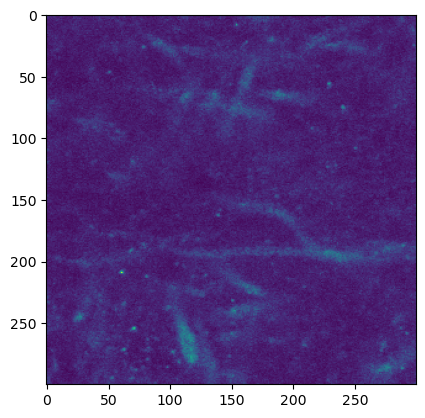

In [47]:
def crop_image_func(input_image):
    output_image = input_image[0:300,0:300]

    return output_image, np.max(output_image)

demo_crop_image, demo_maxval_image = crop_image_func(input_image=image)

print(demo_maxval_image)
plt.imshow(demo_crop_image)

In [ ]:
def cell_detector(input_image, median_filter_size, morphology_filter_size):
    pass # видаліть цей оператор і напишіть свій код тут